# Para el caso de nuestro trabajo

Usando el API de Kaggle para descargar le dataset del siguiente URL 'https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset'

In [7]:
# Comando de API de Kaggle descrito en su documentación
# Doc de la API ---> "https://www.kaggle.com/docs/api#creating-and-maintaining-datasets"
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
ibm-hr-analytics-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# Descromprimimos
!unzip ibm-hr-analytics-attrition-dataset.zip

"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [9]:
import os
from zipfile import ZipFile

# Download the dataset
os.system('kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset')

# Unzip the downloaded dataset
with ZipFile('ibm-hr-analytics-attrition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
# Importamos pandas para trabajar con DataFrames

import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Visualizar
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [11]:
# Verificar si hay valores NaN en alguna columna

df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

### Resultados Preliminares

1.- la salida indica que no hay valores faltantes (NaN) en ninguna de las columnas del DataFrame, ya que todas las columnas tienen el valor False asociado. Esto significa que todas las columnas están completamente llenas de datos, sin valores nulos o faltantes.

2.- Por lo tanto, no hay ningún procedimiento para aplicar sobre los NaNs.

3.- Por lo tanto, el dataset ya esta limpio.

4.- Por lo tanto, el dataset no necesita ser re-indexado.

5.- Lo que sí podemos hacer es renombrarlas al español para que sean más amigables con hispanoparlantes.

In [12]:
# Columnas en el DataFrame
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
# Renombrar las columnas y re-asignar

def rename_df(df):

    df = df.rename(columns={
        'Age': 'Edad', 
        'Attrition': 'Renuncia', 
        'BusinessTravel': 'Viaje_de_Negocios', 
        'DailyRate': 'Tasa_Diaria', 
        'Department': 'Departamento', 
        'DistanceFromHome': 'Distancia_Desde_Casa', 
        'Education': 'Educación', 
        'EducationField': 'Campo_de_Educación', 
        'EmployeeCount': 'Conteo_de_Empleados', 
        'EmployeeNumber': 'Número_de_Empleado', 
        'EnvironmentSatisfaction': 'Satisfacción_del_Entorno', 
        'Gender': 'Género', 
        'HourlyRate': 'Tasa_por_Hora', 
        'JobInvolvement': 'Involucramiento_en_el_Trabajo', 
        'JobLevel': 'Nivel_de_Trabajo', 
        'JobRole': 'Rol_de_Trabajo', 
        'JobSatisfaction': 'Satisfacción_en_el_Trabajo', 
        'MaritalStatus': 'Estado_Civil', 
        'MonthlyIncome': 'Ingreso_Mensual', 
        'MonthlyRate': 'Tasa_Mensual', 
        'NumCompaniesWorked': 'Número_de_Empresas_Trabajadas', 
        'Over18': 'Mayor_de_18', 
        'OverTime': 'Horas_Extra', 
        'PercentSalaryHike': 'Incremento_porcentual_de_Salario', 
        'PerformanceRating': 'Calificación_de_Rendimiento', 
        'RelationshipSatisfaction': 'Satisfacción_en_las_Relaciones', 
        'StandardHours': 'Horas_Estándar', 
        'StockOptionLevel': 'Nivel_de_Acciones', 
        'TotalWorkingYears': 'Total_de_Años_Trabajados', 
        'TrainingTimesLastYear': 'Veces_de_Capacitación_Último_Año', 
        'WorkLifeBalance': 'Equilibrio_Vida_Trabajo', 
        'YearsAtCompany': 'Años_en_la_Empresa', 
        'YearsInCurrentRole': 'Años_en_el_Rol_Actual', 
        'YearsSinceLastPromotion': 'Años_desde_Última_Promoción', 
        'YearsWithCurrManager': 'Años_con_el_Gerente_Actual'
    })
    
    # Para el caso de la columna "Departamento"
    print(df.Departamento.unique())
    
    df['Departamento'] = df['Departamento'].replace({
        'Sales': 'Ventas',
        'Research & Development': 'Investigación y Desarrollo',
        'Human Resources': 'Recursos Humanos'
    })
    
    # Para el caso de la columna "Campo_de_Educación"
    print(df.Campo_de_Educación.unique())
    
    df['Campo_de_Educación'] = df['Campo_de_Educación'].replace({
        'Life Sciences': 'Ciencias de la Vida',
        'Other': 'Otro',
        'Medical': 'Medicina',
        'Marketing': 'Mercadeo',
        'Technical Degree': 'Título Técnico',
        'Human Resources': 'Recursos Humanos'
    })
    
    # Para el caso de la columna "Viaje_de_Negocios"
    print(df.Viaje_de_Negocios.unique())
    
    df['Viaje_de_Negocios'] = df['Viaje_de_Negocios'].replace({
        'Travel_Rarely': 'Viaja Raramente',
        'Travel_Frequently': 'Viaja Frecuentemente',
        'Non-Travel': 'No Viaja'
    })
    
    # Por último para el caso de "Renuncia"
    print(df.Renuncia.unique())
    
    df['Renuncia'] = df['Renuncia'].replace({
        'Yes': 'Si',
        'No': 'No'
    })
    return df

df = rename_df(df)

['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Yes' 'No']


In [14]:
# Por ultimo en este apartado visualizamos el DataFrame y opcionalmente lo guardamos

df

# df.to_csv("datos_bedu_proyecto.csv",index=False) (Opcional)

,Edad,Renuncia,Viaje_de_Negocios,Tasa_Diaria,Departamento,Distancia_Desde_Casa,Educación,Campo_de_Educación,Conteo_de_Empleados,Número_de_Empleado,...,Satisfacción_en_las_Relaciones,Horas_Estándar,Nivel_de_Acciones,Total_de_Años_Trabajados,Veces_de_Capacitación_Último_Año,Equilibrio_Vida_Trabajo,Años_en_la_Empresa,Años_en_el_Rol_Actual,Años_desde_Última_Promoción,Años_con_el_Gerente_Actual
0,41,Si,Viaja Raramente,1102,Ventas,1,2,Ciencias de la Vida,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Viaja Frecuentemente,279,Investigación y Desarrollo,8,1,Ciencias de la Vida,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Si,Viaja Raramente,1373,Investigación y Desarrollo,2,2,Otro,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Viaja Frecuentemente,1392,Investigación y Desarrollo,3,4,Ciencias de la Vida,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Viaja Raramente,591,Investigación y Desarrollo,2,1,Medicina,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Viaja Frecuentemente,884,Investigación y Desarrollo,23,2,Medicina,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Viaja Raramente,613,Investigación y Desarrollo,6,1,Medicina,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Viaja Raramente,155,Investigación y Desarrollo,4,3,Ciencias de la Vida,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Viaja Frecuentemente,1023,Ventas,2,3,Medicina,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [15]:
# Agrupación de edad en rangos generacionales e ingresos
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['grupos_por_edad'] = pd.cut(df['Edad'], bins=bins, labels=labels)
df['grupos_por_ingresos'] = pd.qcut(df['Ingreso_Mensual'], 3, labels=['Bajo', 'Medio', 'Alto'])

# Cambio de caracteristicas categoricas por binarias

df['Renuncia'] = df['Renuncia'].replace({'Si': 1, 'No': 0})
df['Horas_Extra'] = df['Horas_Extra'].replace({'Yes': 1, 'No': 0})

C:\Users\ifrid\AppData\Local\Temp\ipykernel_8900\366930018.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Renuncia'] = df['Renuncia'].replace({'Si': 1, 'No': 0})
C:\Users\ifrid\AppData\Local\Temp\ipykernel_8900\366930018.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Horas_Extra'] = df['Horas_Extra'].replace({'Yes': 1, 'No': 0})


In [16]:
df

,Edad,Renuncia,Viaje_de_Negocios,Tasa_Diaria,Departamento,Distancia_Desde_Casa,Educación,Campo_de_Educación,Conteo_de_Empleados,Número_de_Empleado,...,Nivel_de_Acciones,Total_de_Años_Trabajados,Veces_de_Capacitación_Último_Año,Equilibrio_Vida_Trabajo,Años_en_la_Empresa,Años_en_el_Rol_Actual,Años_desde_Última_Promoción,Años_con_el_Gerente_Actual,grupos_por_edad,grupos_por_ingresos
0,41,1,Viaja Raramente,1102,Ventas,1,2,Ciencias de la Vida,1,1,...,0,8,0,1,6,4,0,5,41-50,Medio
1,49,0,Viaja Frecuentemente,279,Investigación y Desarrollo,8,1,Ciencias de la Vida,1,2,...,1,10,3,3,10,7,1,7,41-50,Medio
2,37,1,Viaja Raramente,1373,Investigación y Desarrollo,2,2,Otro,1,4,...,0,7,3,3,0,0,0,0,31-40,Bajo
3,33,0,Viaja Frecuentemente,1392,Investigación y Desarrollo,3,4,Ciencias de la Vida,1,5,...,0,8,3,3,8,7,3,0,31-40,Bajo
4,27,0,Viaja Raramente,591,Investigación y Desarrollo,2,1,Medicina,1,7,...,1,6,3,3,2,2,2,2,18-30,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Viaja Frecuentemente,884,Investigación y Desarrollo,23,2,Medicina,1,2061,...,1,17,3,3,5,2,0,3,31-40,Bajo
1466,39,0,Viaja Raramente,613,Investigación y Desarrollo,6,1,Medicina,1,2062,...,1,9,5,3,7,7,1,7,31-40,Alto
1467,27,0,Viaja Raramente,155,Investigación y Desarrollo,4,3,Ciencias de la Vida,1,2064,...,1,6,0,3,6,2,0,3,18-30,Medio
1468,49,0,Viaja Frecuentemente,1023,Ventas,2,3,Medicina,1,2065,...,0,17,3,2,9,6,0,8,41-50,Medio


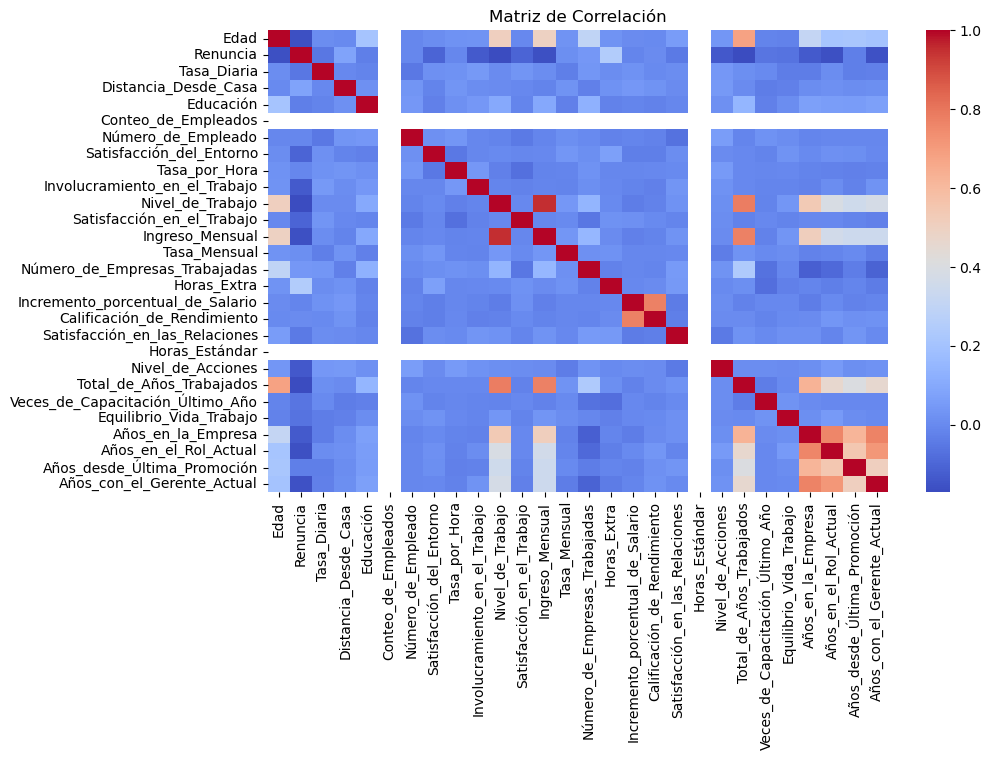

In [17]:
# 4. Matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))


corr_matrix = df.select_dtypes(include=['number'])
corr_matrix = corr_matrix.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### Para el caso de la renuncia podemos apreciar muchas correlaciones negativas marcadas
Como:

1.- Edad

2.- Satisfacción del Entorno

3.- Involucramiento con el Trabajo

4.- Nivel de Trabajo

5.- Satisfacción en el Trabajo

6.- Ingreso Mensual

7.- Nivel de Acciones

8.- Total de Años en el trabajo

9.- Años en la empresa

10.- Años en el Rol Actual

11.- Años con el Gerente actual

12.- Horas Extra (La única moderadamente positiva)

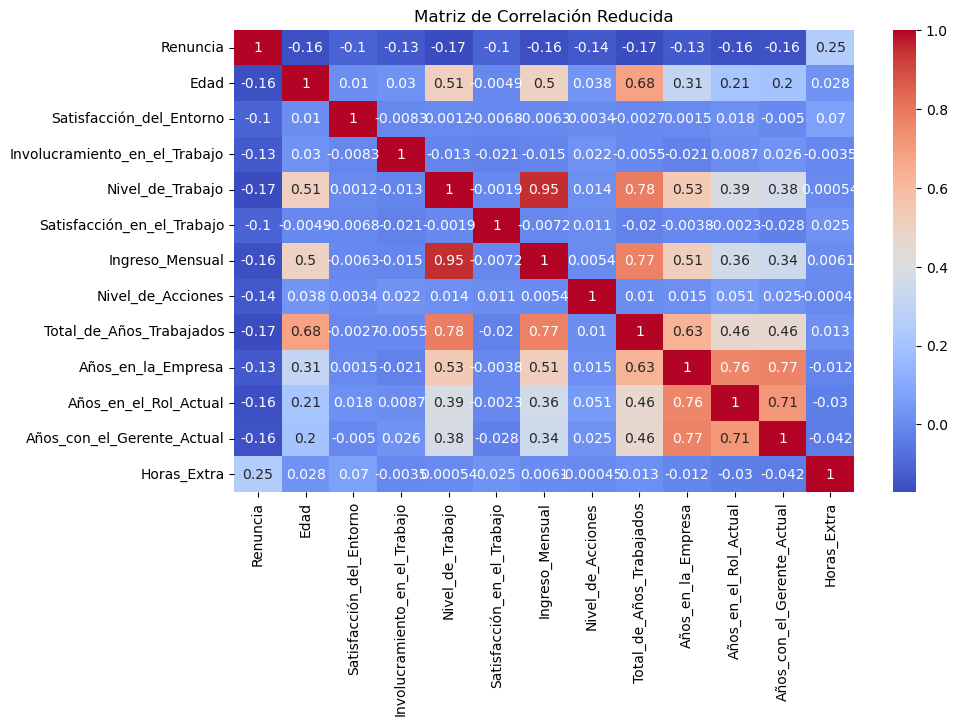

In [18]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['Renuncia',
                  'Edad',
                  'Satisfacción_del_Entorno', 
                  'Involucramiento_en_el_Trabajo',
                  "Nivel_de_Trabajo",
                  'Satisfacción_en_el_Trabajo',
                  'Ingreso_Mensual', 
                  'Nivel_de_Acciones',
                  'Total_de_Años_Trabajados',
                  'Años_en_la_Empresa',
                  'Años_en_el_Rol_Actual',
                  'Años_con_el_Gerente_Actual',
                 'Horas_Extra']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Reducida')
plt.show()

### Podemos apreciar que hay muchas correlaciones fuertes entre estos datos

Aquí se puede apreciar una correlación positiva moderada entre el Ingreso Mensual y los años en la compañía, que explica una relación positiva donde a medida que un individuo pasa más años en una empresa (Que lo podemos traducir a años de permanencia), su salario tiende a aumentar. 

#### Por lo tanto, una hipótesis sería: la permanencia de un individuo está altamente influenciada por el  aumento constante a su salario. 

Usemos un modelo de regresión para validar esto.

In [19]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(df['Ingreso_Mensual'])
y = pd.DataFrame(df['Años_en_la_Empresa'])

regression = LinearRegression()
regression.fit(X,y)
print("Coeficiente de m: ",regression.coef_ )# Theta_1
print("Interceptante: ", regression.intercept_)

Coeficiente de m:  [[0.00066925]]
Interceptante:  [2.65610572]


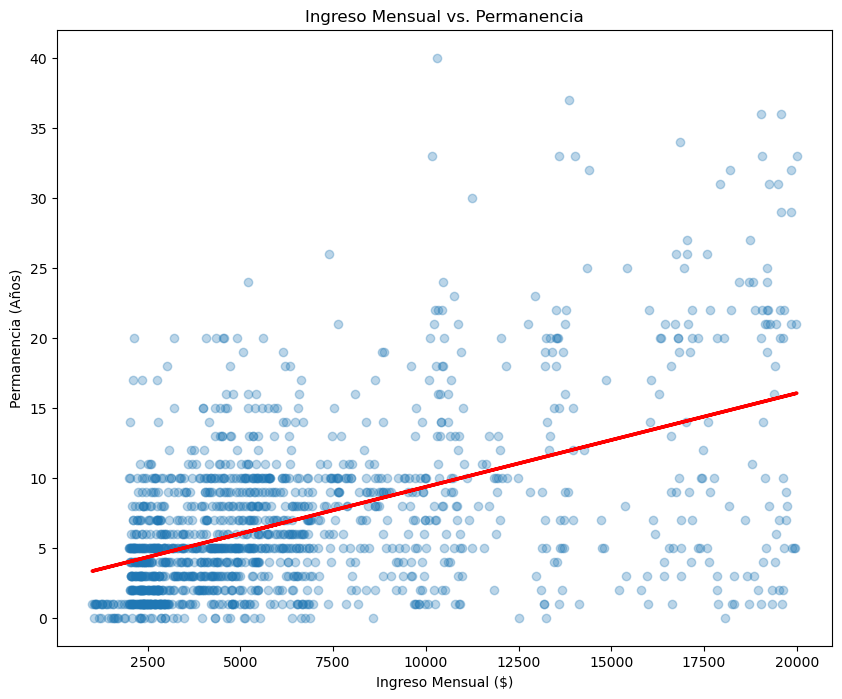

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, regression.predict(X), color = "red", linewidth= 2.5)

plt.title("Ingreso Mensual vs. Permanencia")
plt.xlabel("Ingreso Mensual ($)")
plt.ylabel("Permanencia (Años)")


plt.show()

In [21]:
# Imprimimos la R cuadrada
print(f"¿Cuanto podemos explicar con este modelo simplificado?: cerca del %{regression.score(X,y)*100:.2f} de los casos")

¿Cuanto podemos explicar con este modelo simplificado?: cerca del %26.45 de los casos


### Existe una tendencia clara, sin embargo al solo expicar cerca del %26 de los casos, no podemos afirmar que esta sea mayoritariamente la razón de la renuncia.

# Podemos hacer uso de un Bar-plot para ver qué variables están más correlacionadas con la renuncia también 

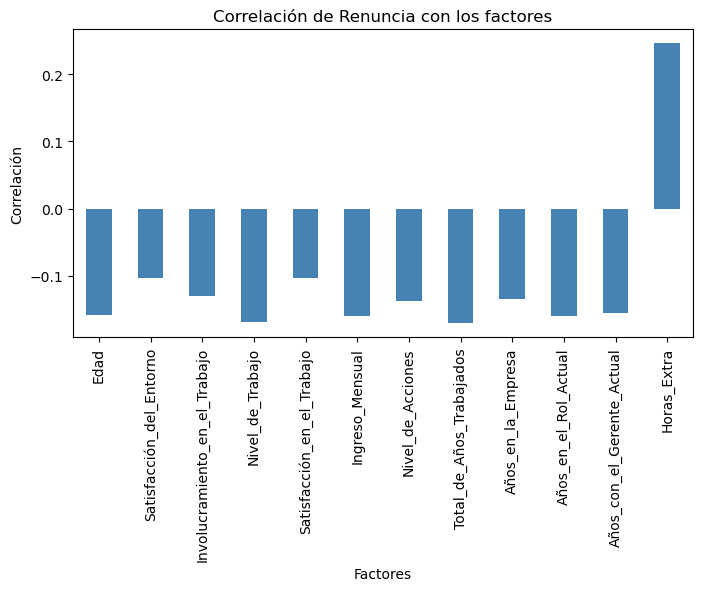

In [22]:
renuncia_corr = corr_matrix['Renuncia'].drop('Renuncia')

plt.figure(figsize=(8, 4))

renuncia_corr.plot(kind='bar', color='steelblue')

plt.title('Correlación de Renuncia con los factores')
plt.ylabel('Correlación')
plt.xlabel('Factores')
plt.show()

#### Recordemos que hay varios departamentos que podrían ser entornos de trabajo aislados que viven diferentes situaciones

Veamos cuanto nivel de trabajo distingue a cada departamento

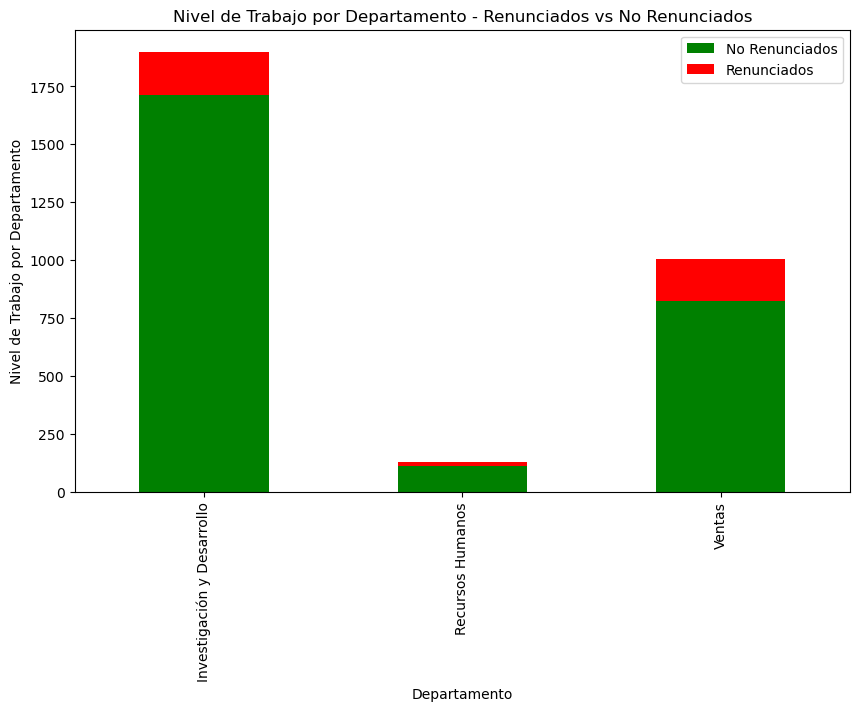

In [23]:
df_grouped = df.groupby(['Departamento', 'Renuncia'])['Nivel_de_Trabajo'].sum().unstack()

df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Nivel de Trabajo por Departamento - Renunciados vs No Renunciados')
plt.ylabel('Nivel de Trabajo por Departamento')
plt.xlabel('Departamento')
plt.legend(['No Renunciados', 'Renunciados'])
plt.show()

Podemos apreciar que los departamentos de ID tienen más nivel de trabajo junto con los de ventas

In [24]:
renuncias = df[df['Renuncia'] == 1]

# número total de empleados por departamento
total_empleados_por_departamento = df.groupby('Departamento')['Renuncia'].count()

print(total_empleados_por_departamento)

# número de renuncias por departamento
renuncias_por_departamento = renuncias.groupby('Departamento')['Renuncia'].count()

print(renuncias_por_departamento)

Departamento
Investigación y Desarrollo    961
Recursos Humanos               63
Ventas                        446
Name: Renuncia, dtype: int64
Departamento
Investigación y Desarrollo    133
Recursos Humanos               12
Ventas                         92
Name: Renuncia, dtype: int64


### Veamos el porcentaje de renuncias por departamento

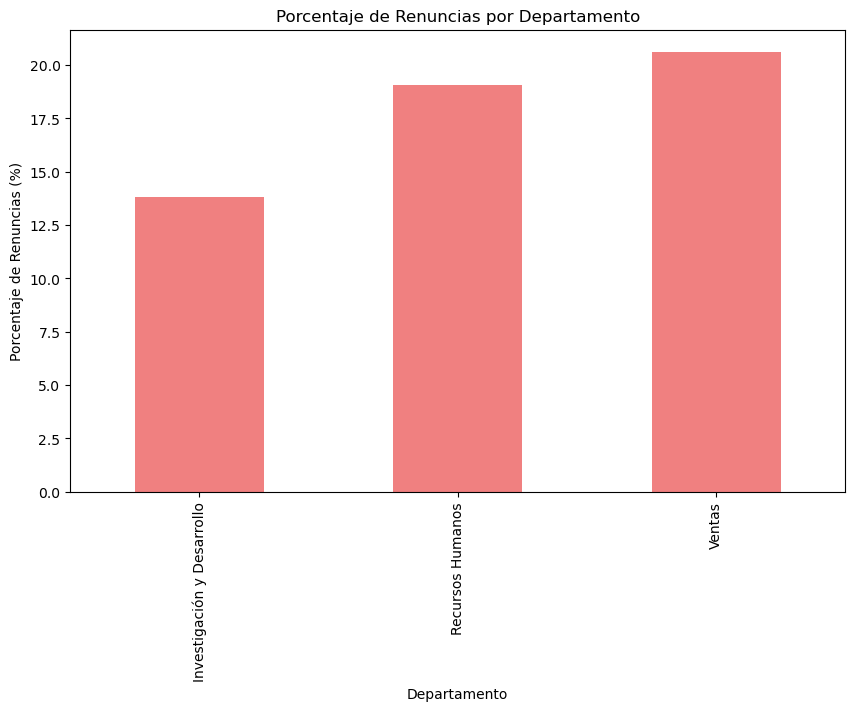

In [25]:
# Calcular el porcentaje de renuncias por departamento
porcentaje_renuncias = (renuncias_por_departamento / total_empleados_por_departamento) * 100

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
porcentaje_renuncias.plot(kind='bar', color='lightcoral')
plt.title('Porcentaje de Renuncias por Departamento')
plt.ylabel('Porcentaje de Renuncias (%)')
plt.xlabel('Departamento')
plt.show()

### Vemos que ventas es donde el hay el porcentaje más grande de renuncias con respecto a su fuerza de trabajo

# ¿Como es la Satisfacción promedio de cada Departamento?

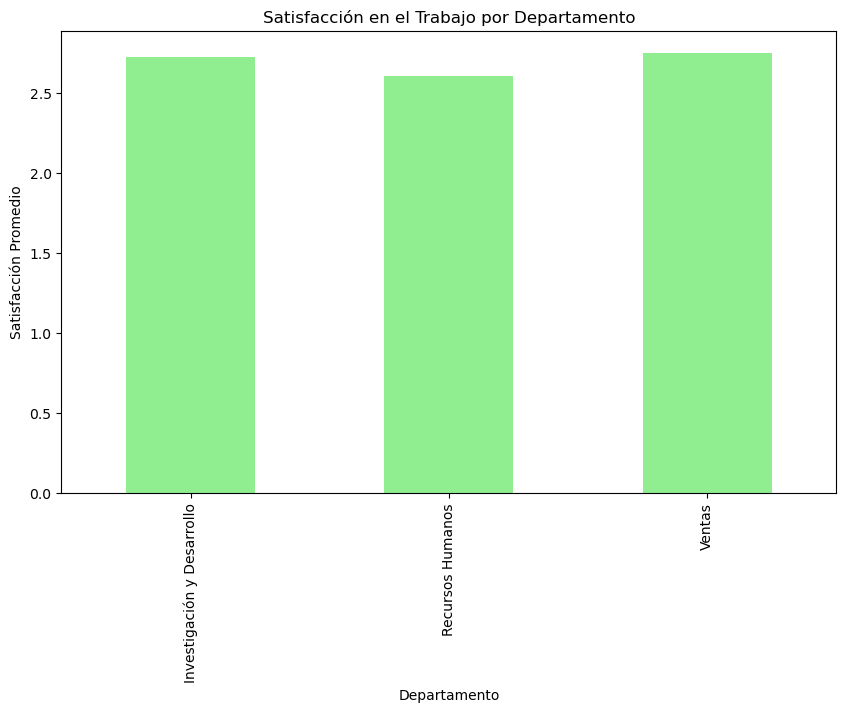

In [26]:
satisfaccion_por_departamento = df.groupby('Departamento')['Satisfacción_en_el_Trabajo'].mean()


plt.figure(figsize=(10, 6))
satisfaccion_por_departamento.plot(kind='bar', color='lightgreen')
plt.title('Satisfacción en el Trabajo por Departamento')
plt.ylabel('Satisfacción Promedio')
plt.xlabel('Departamento')
plt.show()

### Prácticamente la misma para cada departamento esto puede ser por los promedios y la cantidad de gente

# Tratemos a cada departamento como una muestra aislada

In [27]:
df_id = df[df['Departamento'] == 'Investigación y Desarrollo']
df_rh = df[df['Departamento'] == 'Recursos Humanos']
df_v  = df[df['Departamento'] == 'Ventas']

# Caso de ID

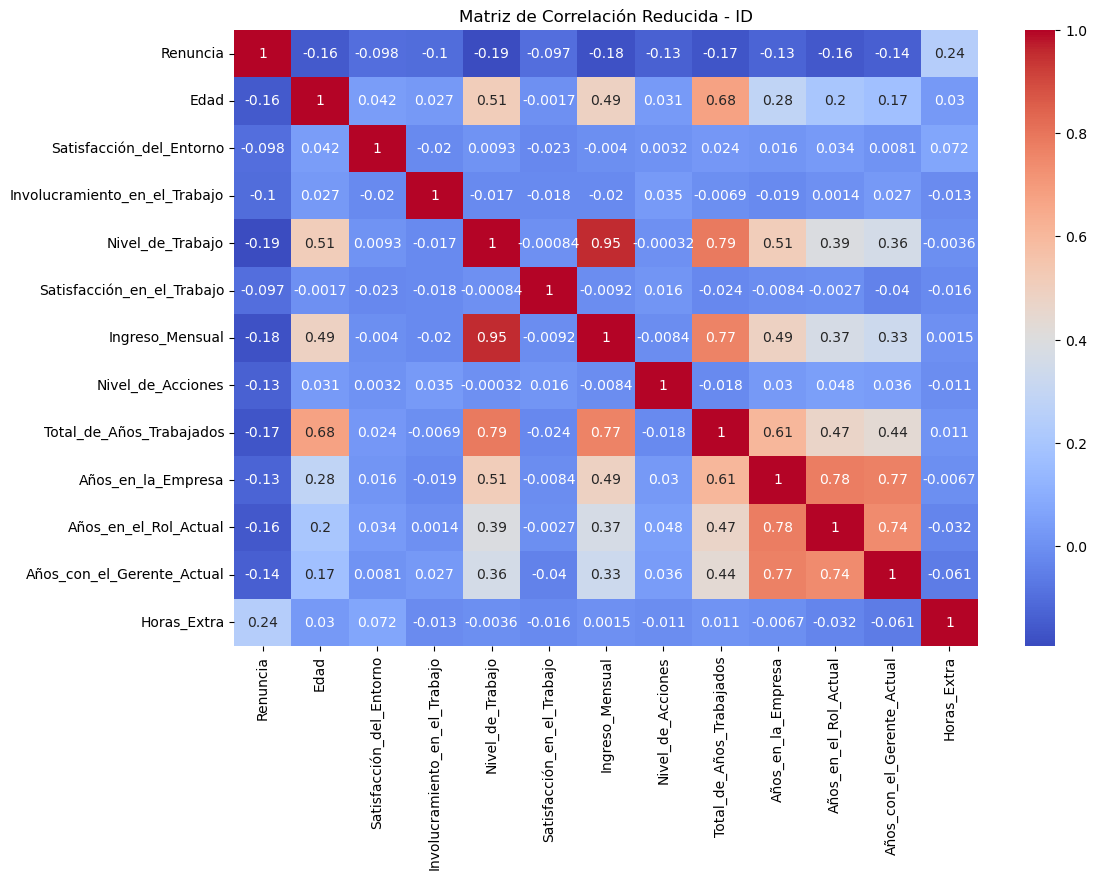

In [28]:
plt.figure(figsize=(12, 8))
corr_matrix = df_id[['Renuncia',
                  'Edad',
                  'Satisfacción_del_Entorno', 
                  'Involucramiento_en_el_Trabajo',
                  "Nivel_de_Trabajo",
                  'Satisfacción_en_el_Trabajo',
                  'Ingreso_Mensual', 
                  'Nivel_de_Acciones',
                  'Total_de_Años_Trabajados',
                  'Años_en_la_Empresa',
                  'Años_en_el_Rol_Actual',
                  'Años_con_el_Gerente_Actual',
                 'Horas_Extra']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Reducida - ID')
plt.show()

(En ID) Aquí parece haber 3 factores predominantes:

1.- Nivel de Trabajo 

2.- Ingreso Mensual

3.- Horas Extras

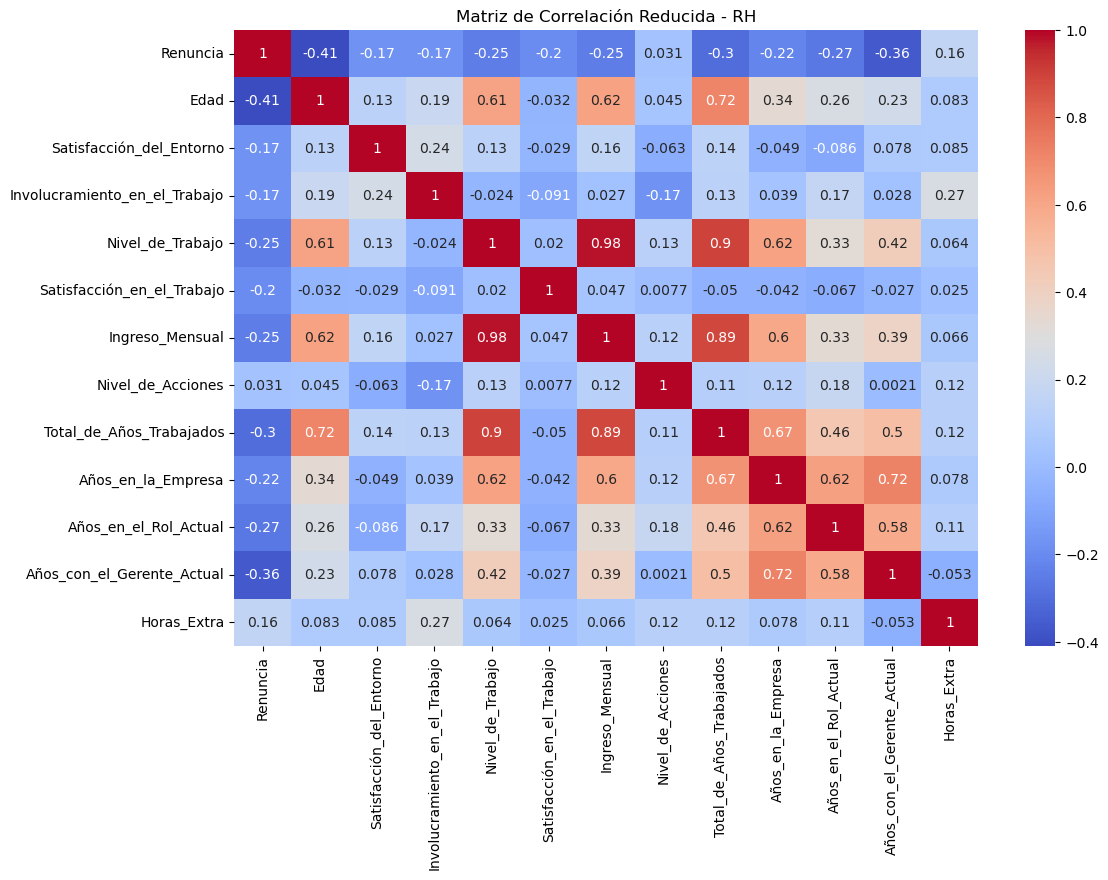

In [29]:
plt.figure(figsize=(12, 8))
corr_matrix = df_rh[['Renuncia',
                  'Edad',
                  'Satisfacción_del_Entorno', 
                  'Involucramiento_en_el_Trabajo',
                  "Nivel_de_Trabajo",
                  'Satisfacción_en_el_Trabajo',
                  'Ingreso_Mensual', 
                  'Nivel_de_Acciones',
                  'Total_de_Años_Trabajados',
                  'Años_en_la_Empresa',
                  'Años_en_el_Rol_Actual',
                  'Años_con_el_Gerente_Actual',
                 'Horas_Extra']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Reducida - RH')
plt.show()

(En RH) Aquí parece haber 2 factores predominantes:

1.- Edad

2.- Años con el gerente actual

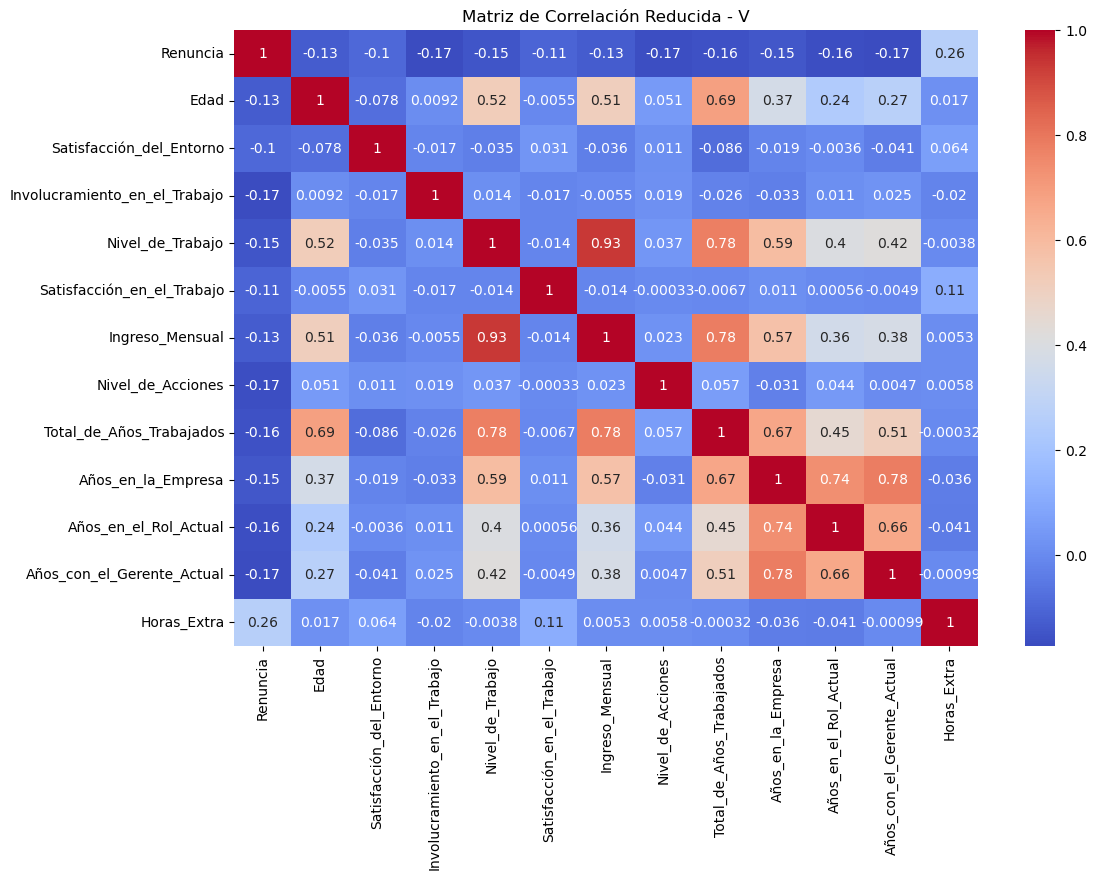

In [30]:
plt.figure(figsize=(12, 8))
corr_matrix = df_v[['Renuncia',
                  'Edad',
                  'Satisfacción_del_Entorno', 
                  'Involucramiento_en_el_Trabajo',
                  "Nivel_de_Trabajo",
                  'Satisfacción_en_el_Trabajo',
                  'Ingreso_Mensual', 
                  'Nivel_de_Acciones',
                  'Total_de_Años_Trabajados',
                  'Años_en_la_Empresa',
                  'Años_en_el_Rol_Actual',
                  'Años_con_el_Gerente_Actual',
                 'Horas_Extra']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Reducida - V')
plt.show()

(En Ventas) Aquí parece haber muchos factores predominantes:

El más destacable

1.- Horas Extra

# Veamos esto con un Árbol Dinámico

In [31]:
# Volveremos a cargar el Dataset por que necesitamos unas variables categoricas como estaban antes
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = rename_df(df)

['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Yes' 'No']


In [32]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'


fig = px.treemap(
    df,
    path=['Departamento', 'Rol_de_Trabajo'],  
    values='Involucramiento_en_el_Trabajo',
    color='Satisfacción_en_el_Trabajo',
    color_continuous_scale='RdYlGn',
    hover_data=['Involucramiento_en_el_Trabajo', 'Satisfacción_en_el_Trabajo'],
    hover_name='Rol_de_Trabajo'
)

fig.update_layout(
    title={
        'text': 'Productividad de Empleado por Departamento y Rol',
        'y': .97,
        'x': 0.35,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.update_traces(
    hovertemplate='<b>Departamento</b>: %{label}<br>'
                  '<b>Rol</b>: %{hovertext}<br>'
                  '<b>Involucramiento</b>: %{customdata[0]}'
)

fig.show()


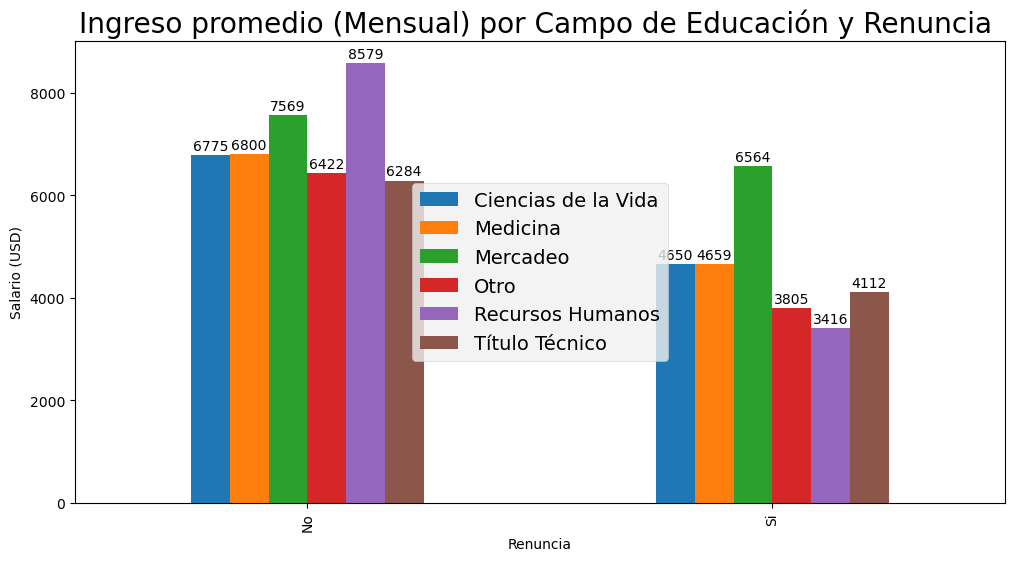

In [33]:
bar = df.groupby(['Renuncia','Campo_de_Educación'])['Ingreso_Mensual'].mean().unstack().plot(kind='bar', figsize=(12, 6))

plt.style.use('fivethirtyeight')

for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=10,padding=1.5)
plt.title('Ingreso promedio (Mensual) por Campo de Educación y Renuncia ')
plt.ylabel('Salario (USD)')
plt.legend(loc='center')
plt.show()


In [34]:
import numpy as np
from scipy import stats

# Dividir el dataset en dos grupos aleatorios (A y B)
np.random.seed(42)  # Para reproducibilidad
df['grupo'] = np.random.choice(['A', 'B'], size=len(df))

# Calcular una métrica (por ejemplo, tasa de retención) para cada grupo
attrition_rate_A = df[df['grupo'] == 'A']['Renuncia'].value_counts(normalize=True).get('Si', 0)
attrition_rate_B = df[df['grupo'] == 'B']['Renuncia'].value_counts(normalize=True).get('Si', 0)

# Prueba estadística de diferencia entre grupos
t_stat, p_value = stats.ttest_ind(
    df[df['grupo'] == 'A']['Renuncia'].map({'Si': 1, 'No': 0}),
    df[df['grupo'] == 'B']['Renuncia'].map({'Si': 1, 'No': 0}),
    equal_var=False
)

print(f"Tasa de Renuncia en Grupo A: {attrition_rate_A}")
print(f"Tasa de Renuncia en Grupo B: {attrition_rate_B}")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


Tasa de Renuncia en Grupo A: 0.14421768707482993
Tasa de Renuncia en Grupo B: 0.1782312925170068
T-Statistic: -1.7738310607418533, P-Value: 0.07629986873273162


In [38]:
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Unir textos de la columna 'Departamento'
text_data = " ".join(df['Departamento'].dropna().values)

# Tokenización
tokens = word_tokenize(text_data)

# Eliminar stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Calcular frecuencia
fdist_filtered = FreqDist(filtered_tokens)

# Mostrar las palabras más comunes
print(fdist_filtered.most_common(10))

# Visualizar las palabras más comunes
words, counts = zip(*fdist_filtered.most_common(10))

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title('Palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\ifrid/nltk_data'
    - 'c:\\Users\\ifrid\\anaconda3\\nltk_data'
    - 'c:\\Users\\ifrid\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\ifrid\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ifrid\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
